# Unidades Básicas de Saúde - UBS

As Unidades Básicas de Saúde (UBS) são a porta de entrada preferencial do Sistema Único de Saúde (SUS).
O objetivo desses postos é atender até 80% dos problemas de saúde da população, sem que haja a necessidade de
encaminhamento para hospitais.

No Portal Brasileiros de Dados Abertos (http://www.dados.gov.br) podemos ter acesso a uma lista de todas as UBS brasileiras, com algumas informações sobre cada unidade, incluindo a indicação de Latitude e Longitude para georeferenciamento.


## Dados das UBS

Os dados sobre as UBS foram obtidos no Portal Brasileiros de Dados Abertos, e foram baixados na data de 13/07/2018.

Link para os dados -> http://dados.gov.br/dataset/unidades-basicas-de-saude-ubs

O conjunto de dados possui 13 colunas, listadas a seguir: **[0] vlr_latitude**, **[1] vlr_longitude**, [2] cod_munic, [3] cod_cnes, **[4] nom_estab**, [5] dsc_endereco, [6] dsc_bairro, **[7] dsc_cidade**, [8] dsc_telefone, **[9] dsc_estrut_fisic_ambiencia**, **[10] dsc_adap_defic_fisic_idosos**, **[11] dsc_equipamentos** e **[12] dsc_medicamentos**.

Somente as colunas marcadas em negrito serão carregadas pois as demais colunas não trazem valores relevantes para análise. Infelizmente o conjunto de dados traz as cidades de cada UBS mas não as Unidades da Federação - UF onde a unidade está localizada, o que poderia permitir outras análises.

Nesse exemplo iremos marcar as UBS em um mapa, usando os dados de Latitude e Longitude.


## Mapas com Folium

Todos os códigos de geração de mapas usando o Folium foram baseados no excelente tutorial feito pela Jéssica Temporal.

Link para o tutorial -> http://jtemporal.com/folium/

In [1]:
# Importando as bibliotecas
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [2]:
# Carregando o arquivo ubs.csv e transformando em DataFrame do pandas
arquivo = 'ubs.csv'

# Vamos carregar apenas os dados de interesse
df = pd.read_csv(arquivo, usecols=[0, 1, 4, 7, 9, 10, 11, 12])

# E renomear as colunas
df.columns = ['Latitude', 'Longitude', 'Nome UBS', 'Cidade', 'Estrutura Fisica', 'Acessibilidade', 'Equipamentos', 'Medicamentos']

df.head()

,Latitude,Longitude,Nome UBS,Cidade,Estrutura Fisica,Acessibilidade,Equipamentos,Medicamentos
0,-10.911237,-37.062078,US OSWALDO DE SOUZA,Aracaju,Desempenho acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média
1,-9.485943,-35.857573,USF ENFERMEIRO PEDRO JACINTO AREA 09,Rio Largo,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
2,-23.896000,-53.410000,UNIDADE DE ATENCAO PRIMARIA SAUDE DA FAMILIA,Perobal,Desempenho muito acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho muito acima da média
3,-16.447874,-41.009860,POSTO DE SAUDE DE BOM JESUS DA ALDEIA,Jequitinhonha,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
4,-6.573311,-35.107605,POSTO ANCORA URUBA,Mataraca,Desempenho acima da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média


In [3]:
# Qual o tamanho do conjunto de dados (linhas, colunas)?
df.shape

(37690, 8)

In [4]:
# Quais os tipos de dados de cada coluna?
df.dtypes

Latitude            float64
Longitude           float64
Nome UBS             object
Cidade               object
Estrutura Fisica     object
Acessibilidade       object
Equipamentos         object
Medicamentos         object
dtype: object

In [5]:
# Vamos verificar as condições das UBS com relação a...

# Estrutura Fisica
df['Estrutura Fisica'].value_counts()

Desempenho mediano ou  um pouco abaixo da média    21909
Desempenho acima da média                           9042
Desempenho muito acima da média                     6739
Name: Estrutura Fisica, dtype: int64

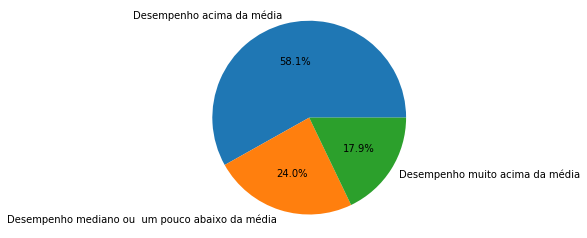

In [6]:
labels = df['Estrutura Fisica'].unique()
sizes = df['Estrutura Fisica'].value_counts(normalize = True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [7]:
# Acessibilidade
df['Acessibilidade'].value_counts()

Desempenho mediano ou  um pouco abaixo da média    24366
Desempenho acima da média                           8905
Desempenho muito acima da média                     4419
Name: Acessibilidade, dtype: int64

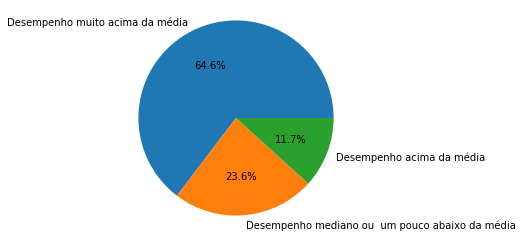

In [8]:
labels = df['Acessibilidade'].unique()
sizes = df['Acessibilidade'].value_counts(normalize = True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [9]:
# Equipamentos
df['Equipamentos'].value_counts()

Desempenho mediano ou  um pouco abaixo da média    29922
Desempenho acima da média                           6424
Desempenho muito acima da média                     1344
Name: Equipamentos, dtype: int64

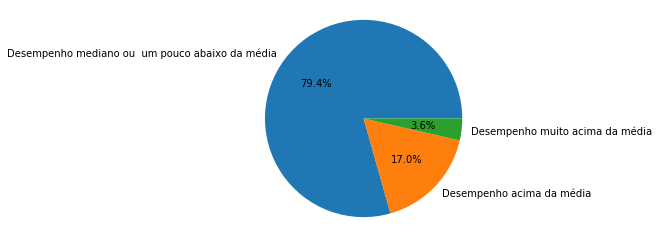

In [10]:
labels = df['Equipamentos'].unique()
sizes = df['Equipamentos'].value_counts(normalize = True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [11]:
# Medicamentos
df['Medicamentos'].value_counts()

Desempenho mediano ou  um pouco abaixo da média    20741
Desempenho acima da média                          12781
Desempenho muito acima da média                     4168
Name: Medicamentos, dtype: int64

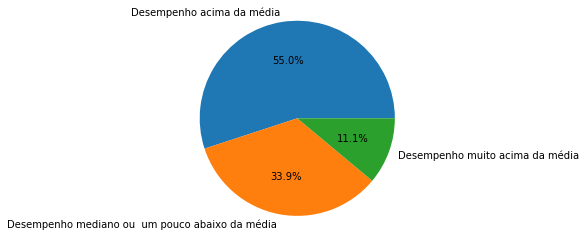

In [12]:
labels = df['Medicamentos'].unique()
sizes = df['Medicamentos'].value_counts(normalize = True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [13]:
# Para exibirmos as UBS no mapa
# primeiro precisamos criar um mapa do Brasil usando o Folium

# Precisamos informar uma localizacao (latitude, longitude)
# e o zoom, para o mapa aparecer corretamente na tela
brasil = folium.Map(
    location=[-16.1237611, -59.9219642],    # Coordenadas retiradas do Google Maps
    zoom_start=4
)

brasil

## Mostrando o mapa no GitHub

Como o Github não mostra os mapas do Folium, vou colocar a imagem correspondente

![title](mapa_brasil.png)


## Necessidade de reduzir a base de dados

Como nossa base de dados tem 37.690 UBS a geração do mapa com todas as marcações pode travar o seu computador,
por isso iremos reduzir nossa base de dados permitindo a geração do mapa

In [14]:
# Vamos criar um novo DataFrame apenas com as UBS de Brasília
# Caso você tenha interesse, pode modificar esse código selecionando sua própria cidade
df_bsb = df[df['Cidade'] == 'Brasília']

df_bsb.head()

,Latitude,Longitude,Nome UBS,Cidade,Estrutura Fisica,Acessibilidade,Equipamentos,Medicamentos
264,-16.011565,-48.073447,CSG 01 GAMA,Brasília,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho acima da média
458,-15.890661,-48.112178,PSU SAMAMBAIA QUADRA 317,Brasília,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
897,-15.635862,-47.846875,UBS SERRA AZUL,Brasília,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
974,-15.669841,-48.200691,PSU BRAZLANDIA 01,Brasília,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
1118,-15.770670,-47.778597,PSU QUADRA 18,Brasília,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média


In [15]:
# Vamos criar outro mapa mostrando Brasília de forma mais centralizada

# Precisamos informar uma localizacao (latitude, longitude)
# e o zoom, para o mapa aparecer corretamente na tela
brasilia = folium.Map(
    location=[-15.7217175,-47.7],    # Coordenadas retiradas do Google Maps / Longitude ajustada
    zoom_start=10
)

brasilia

## Mostrando o mapa no GitHub

Como o Github não mostra os mapas do Folium, vou colocar a imagem correspondente

![title](mapa_brasilia.png)

In [16]:
# Para mostrar cada UBS no mapa iremos criar um marcador para cada unidade
# usando sua Latitude e Longitude para a localização
# e seu nome como popup
for _, ubs in df_bsb.iterrows():
    folium.Marker(
        location=[ubs['Latitude'], ubs['Longitude']],
        popup=ubs['Nome UBS']
    ).add_to(brasilia)
    
brasilia

## Mostrando o mapa no GitHub

Como o Github não mostra os mapas do Folium, vou colocar a imagem correspondente

![title](mapa_brasilia_ubs.png)

## Próximos passos

- Mesmo tendo 37.690 UBS na base de dados é possível plotá-las por completo no mapa usando algum computador mais potente
ou uma infraestutura específica para isso, como os notebooks do Google Collabs ou do Kaggle.

- Apesar da base de dados original não conter informações sobre as Unidades da Federação de cada UBS é possível identificar
a UF de cada cidade e incrementar o conjunto de dados. Assim podemos fazer outras análises e plotar as UBS por estado, e não
apenas por cidade. 